In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('cervical-cancer-new.csv');

#資料欄位與型態
data.info()

data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           835 non-null    int64  
 2   First sexual intercourse            835 non-null    int64  
 3   Num of pregnancies                  835 non-null    int64  
 4   Smokes                              835 non-null    int64  
 5   Smokes (years)                      835 non-null    float64
 6   Smokes (packs/year)                 835 non-null    float64
 7   Hormonal Contraceptives             835 non-null    int64  
 8   Hormonal Contraceptives (years)     835 non-null    float64
 9   IUD                                 835 non-null    int64  
 10  IUD (years)                         835 non-null    float64
 11  STDs                                835 non-n

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#刪除不需要的欄位
#data.drop(data.columns[[-1, 0]], axis=1, inplace=True)
#data.info()

In [25]:
Biopsy_all = list(data.shape)[0]
Biopsy_categories = list(data['Biopsy'].value_counts())

print("資料筆數{}, 切片檢查(0){}筆, 切片檢查(1){}筆".format(Biopsy_all, Biopsy_categories[0], Biopsy_categories[1]))

資料筆數835, 切片檢查(0)781筆, 切片檢查(1)54筆


In [26]:
#取特徵欄位
features_mean= list(data.columns[1:11])

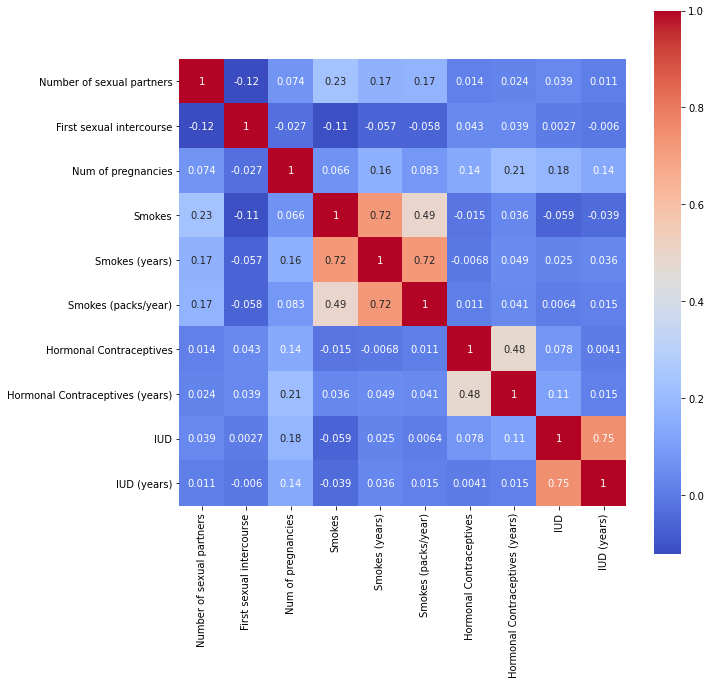

In [27]:
#計算correlation
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

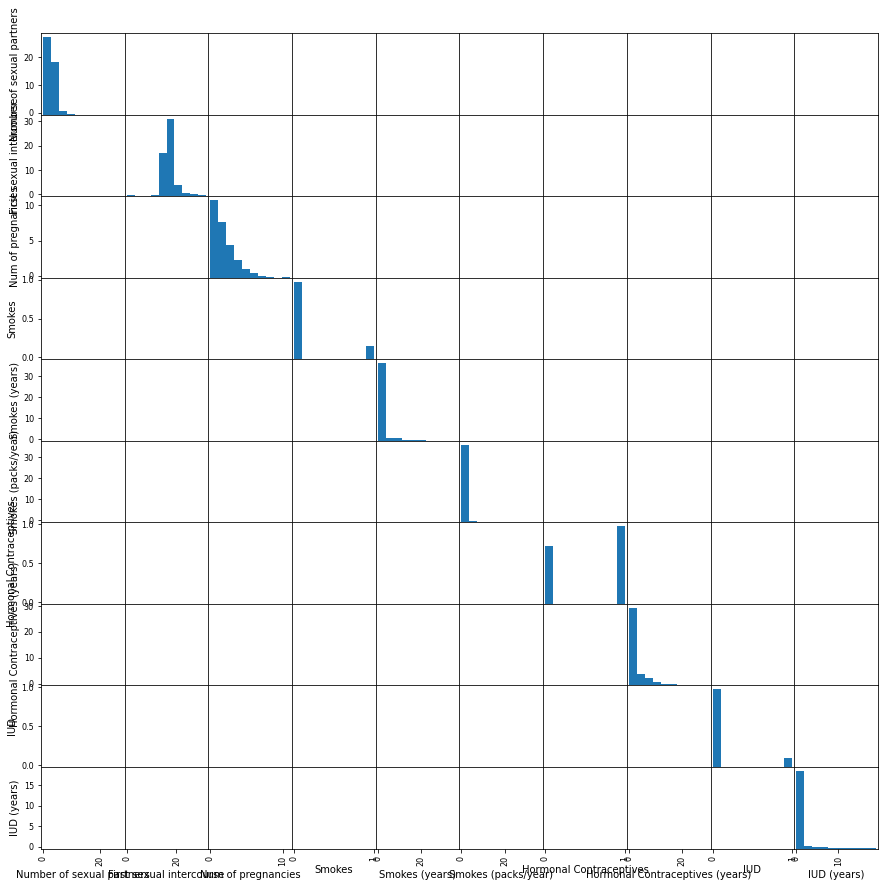

In [20]:
#M:Malignant
#B:Benign
color_dic = {0:'red', 1:'blue'}
colors = data['Biopsy'].map(lambda x: color_dic.get(x))

#用於比較惡性與良性腫瘤於這些特徵欄位的資料分佈
sm = pd.plotting.scatter_matrix(data[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

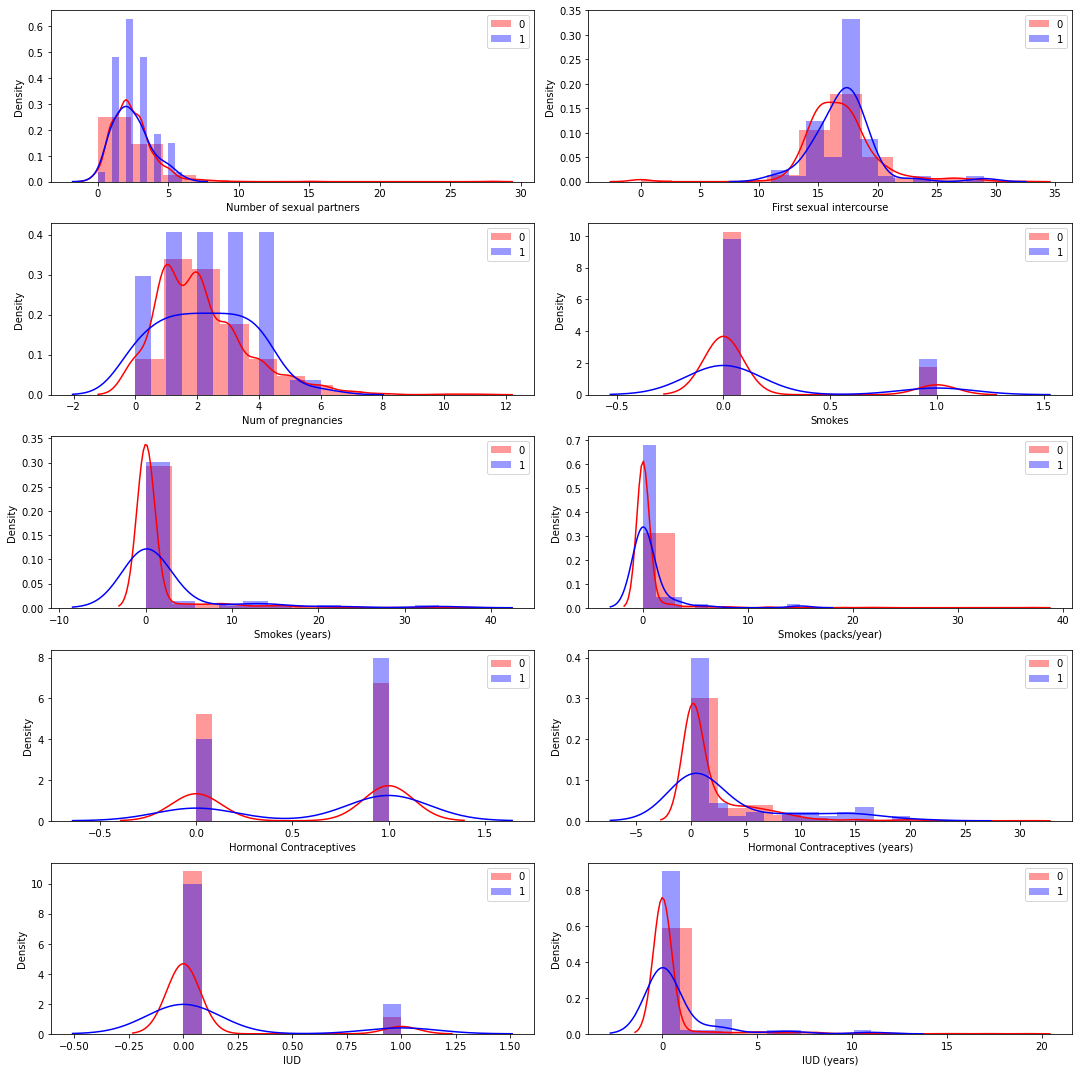

In [28]:

#用於比較惡性與良性腫瘤於這些特徵欄位的資料分佈

bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data[data['Biopsy']==0][feature], bins=bins, color='red', label=0);
    sns.distplot(data[data['Biopsy']==1][feature], bins=bins, color='blue', label=1);
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

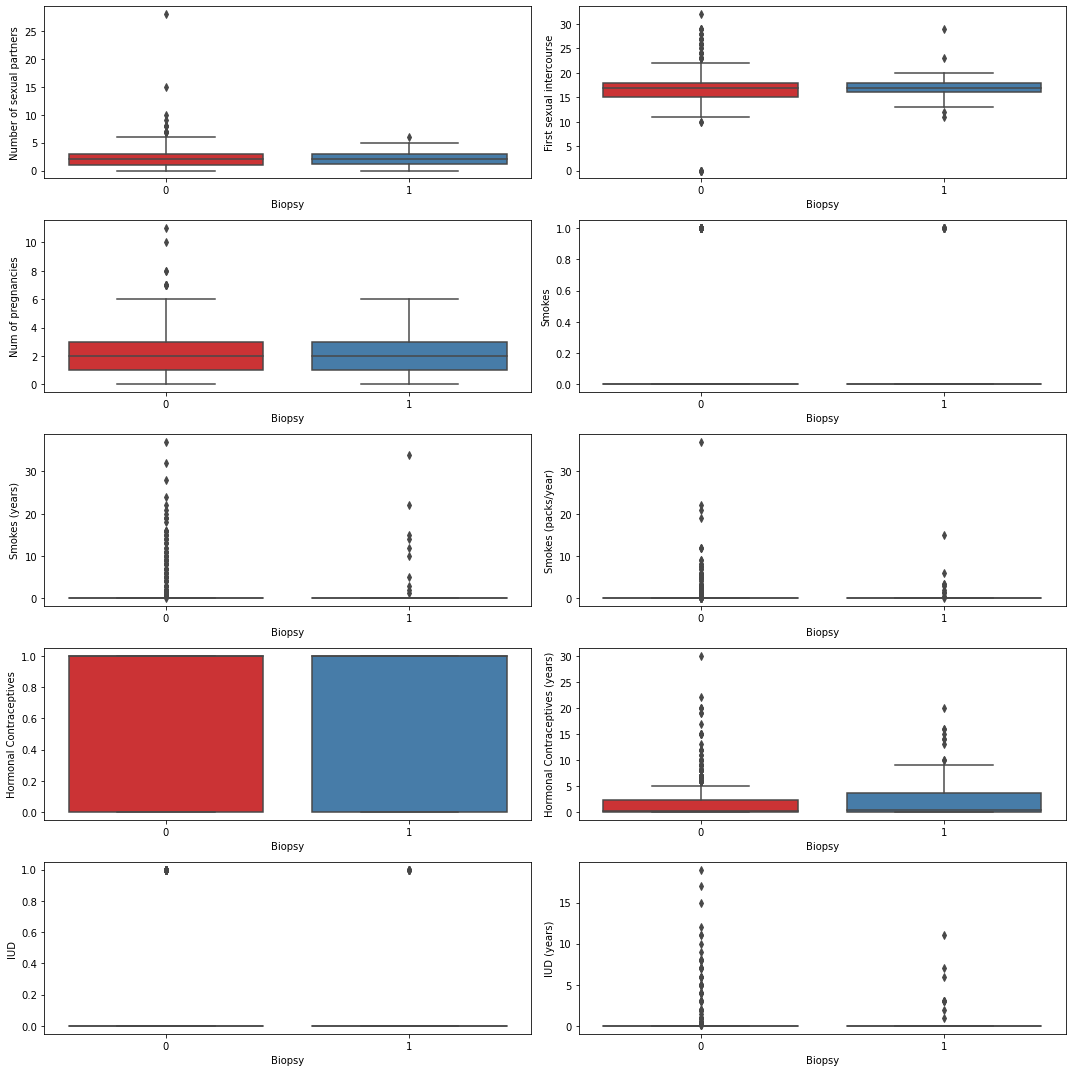

In [22]:
#用於比較惡性與良性腫瘤於這些特徵欄位的資料分佈

plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='Biopsy', y=feature, data=data, palette="Set1")

plt.tight_layout()
plt.show()

In [38]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import time

#特徵選擇
features_selection = ['Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'STDs (number)', 'IUD (years)']

diag_map = {'1':1, '0':0}
data['Biopsy'] = data['Biopsy'].map(diag_map)

X = data.loc[:,features_mean]
y = data.loc[:, 'Biopsy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

In [39]:
#選擇模型 
#隨機梯度下降演算法

from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').